## Buse Küçükçoban



## Data


In [3]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Read csv
data = pd.read_csv("churn.csv")
data.head(10)


,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
5,0,118,0,0,0.00,0,223.4,98,57.0,11.03,6.3
6,0,121,1,1,2.03,3,218.2,88,87.3,17.43,7.5
7,0,147,0,0,0.00,0,157.0,79,36.0,5.16,7.1
8,0,117,1,0,0.19,1,184.5,97,63.9,17.58,8.7
9,0,141,0,1,3.02,0,258.6,84,93.2,11.10,11.2


In [73]:
data['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [5]:
# analyse mising values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [6]:
data.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [153]:
data.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

## Exploratory Data Analysis

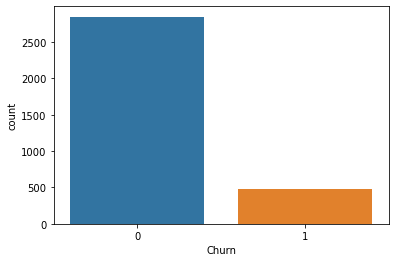

In [113]:
# Our label Distribution (countplot)

sns.countplot(x=data.Churn,data=data)
plt.show()

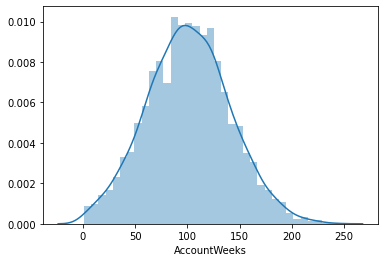

In [8]:
# Example EDA

sns.distplot(data["AccountWeeks"])

## Preprocessing

In [157]:
a = data.duplicated()
a.value_counts()

False    3333
dtype: int64

## ML Application


In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, confusion_matrix
from scipy import stats

In [47]:
z = np.abs(stats.zscore(data))
z

array([[0.41167182, 0.67648946, 0.32758048, ..., 1.99072703, 0.0715836 ,
        0.08500823],
       [0.41167182, 0.14906505, 0.32758048, ..., 1.56451025, 0.10708191,
        1.24048169],
       [0.41167182, 0.9025285 , 0.32758048, ..., 0.26213309, 1.57434567,
        0.70312091],
       ...,
       [0.41167182, 1.83505538, 0.32758048, ..., 0.01858065, 1.73094204,
        1.3837779 ],
       [0.41167182, 2.08295458, 3.05268496, ..., 0.38390932, 0.81704825,
        1.87621082],
       [0.41167182, 0.67974475, 0.32758048, ..., 2.66049626, 1.28129669,
        1.24048169]])

In [114]:
y = data["Churn"]
y.value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [128]:
outliers = list(set(np.where(z>3)[0]))
len(outliers)

414

In [133]:
#drop outliers
data2 = data.drop(outliers,axis = 0).reset_index(drop = False)
display(data2)
y2 = y[list(data2["index"])]
len(y2)


,index,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,6,0,121,1,1,2.03,3,218.2,88,87.3,17.43,7.5
4,8,0,117,1,0,0.19,1,184.5,97,63.9,17.58,8.7
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,3327,0,79,1,0,0.00,2,134.7,98,40.0,9.49,11.8
2915,3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
2916,3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
2917,3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1


2919

In [134]:
y2.value_counts()

0    2598
1     321
Name: Churn, dtype: int64

In [135]:
X= data2.drop('index', axis = 1)
X= X.drop('Churn', axis=1)
from sklearn.preprocessing import StandardScaler, MinMaxScaler
X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[ 0.69196206,  0.        ,  1.63312138, ...,  2.05929645,
        -0.068431  , -0.0941079 ],
       [ 0.1624696 ,  0.        ,  1.63312138, ...,  1.62161451,
        -0.10450144,  1.29308134],
       [ 0.9188874 ,  0.        , -0.61232436, ..., -0.25416527,
        -1.59541298,  0.73070732],
       ...,
       [-0.82087355,  0.        , -0.61232436, ...,  0.0209491 ,
        -0.95015288, -0.2440743 ],
       [-1.82943062,  0.        , -0.61232436, ..., -0.0040613 ,
         1.76314581,  1.44304774],
       [-0.66958999,  0.        ,  1.63312138, ...,  2.74708237,
         1.30625356,  1.29308134]])

In [136]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

#Scaling and outlier removed
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y2, test_size=0.3, random_state=42)

model = LogisticRegression(solver ='lbfgs', random_state = 42)
model.fit(X_train, y_train)
cv = cross_validate(model,X_train,y_train,cv = 3, n_jobs=-1, return_estimator=True)

print("Mean training accuracy: {}".format(np.mean(cv['test_score'])))
print("Test accuracy: {}".format(cv["estimator"][0].score(X_test,y_test)))

Mean training accuracy: 0.8996573666177191
Test accuracy: 0.886986301369863


In [137]:
cv["estimator"][0]

LogisticRegression(random_state=42)

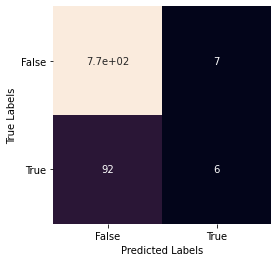

In [140]:
from sklearn.metrics import confusion_matrix
predict = cv["estimator"][0].predict(X_test)

cm = confusion_matrix(y_test, predict)
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(["False","True"])
ax.yaxis.set_ticklabels(["False","True"], rotation=0)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
plt.show()


In [143]:
from sklearn.metrics import classification_report
print(classification_report(y_test,cv["estimator"][0].predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       778
           1       0.46      0.06      0.11        98

    accuracy                           0.89       876
   macro avg       0.68      0.53      0.52       876
weighted avg       0.85      0.89      0.85       876



In [146]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

final_model = cv["estimator"][0]

y_predict = final_model.predict(X_test)

print("Accuracy:",accuracy_score(y_test,y_predict))
print("Precision:",precision_score(y_test,y_predict))
print("Recall:",recall_score(y_test,y_predict))
print("F1 Score:",f1_score(y_test,y_predict))

Accuracy: 0.886986301369863
Precision: 0.46153846153846156
Recall: 0.061224489795918366
F1 Score: 0.10810810810810811


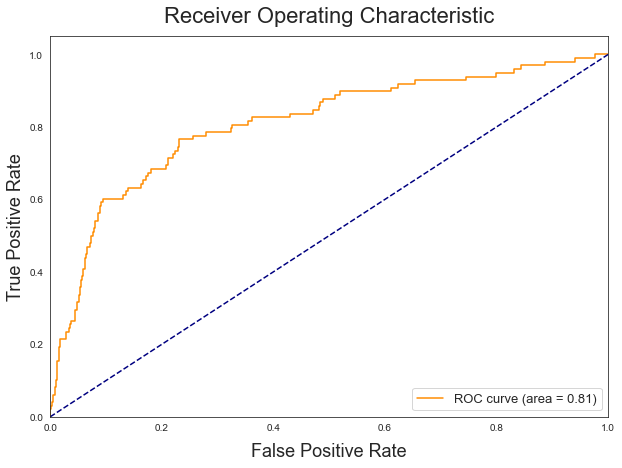

In [154]:
from sklearn.metrics import roc_curve, auc

y_pred_prop = final_model.predict_proba(X_test)[:,1]

fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_prop)
roc_auc_log = auc(fpr_log, tpr_log)

sns.set_style("white")
plt.figure(figsize=(10, 7))
plt.plot(fpr_log, tpr_log, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc_log)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=18,labelpad =10)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Receiver Operating Characteristic',fontsize=22).set_position([.5, 1.02])
plt.legend(loc="lower right",fontsize=13)
plt.show()